# IEEE-CIS Fraud Detection Dataset EDA

## Import Libraries

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import skew, skewtest, pearsonr, spearmanr, normaltest, levene, norm, t, ttest_ind

## Import Train and Test Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!ls -la /content/drive/MyDrive/dataset-ta

total 5017010
-rw------- 1 root root 1743292229 Dec 31 03:11 merged_test.pkl
-rw------- 1 root root 2039170836 Dec 31 03:11 merged_train.pkl
-rw------- 1 root root    6080314 Dec 11  2019 sample_submission.csv
-rw------- 1 root root   25797161 Dec 11  2019 test_identity.csv
-rw------- 1 root root  613194934 Dec 11  2019 test_transaction.csv
-rw------- 1 root root   26529680 Dec 11  2019 train_identity.csv
-rw------- 1 root root  683351067 Dec 11  2019 train_transaction.csv


In [ ]:
%%time
train_transaction = pd.read_csv('/content/drive/MyDrive/dataset-ta/train_transaction.csv', index_col='TransactionID')
test_transaction = pd.read_csv('/content/drive/MyDrive/dataset-ta/test_transaction.csv', index_col='TransactionID')
train_identity = pd.read_csv('/content/drive/MyDrive/dataset-ta/train_identity.csv', index_col='TransactionID')
test_identity = pd.read_csv('/content/drive/MyDrive/dataset-ta/test_identity.csv', index_col='TransactionID')

CPU times: user 42.8 s, sys: 16.5 s, total: 59.3 s
Wall time: 1min 4s


## Check Data

In [ ]:
print(f'train_transaction shape is {train_transaction.shape}')
print(f'test_transaction shape is {test_transaction.shape}')
print(f'train_identity shape is {train_identity.shape}')
print(f'test_identity shape is {test_identity.shape}')

train_transaction shape is (590540, 393)
test_transaction shape is (506691, 392)
train_identity shape is (144233, 40)
test_identity shape is (141907, 40)


In [ ]:
train_transaction.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.

In [ ]:
train_identity.head()

,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
test_transaction.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87

In [ ]:
test_identity.head()

,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,-360.0,New,NotFound,225.0,NaN,271.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,27.0,NaN,Found,Found,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,567.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


Merge Data and save to pickle format

In [ ]:
train_data = train_transaction.merge(train_identity, how='left', on='TransactionID')
del train_transaction, train_identity

test_data = test_transaction.merge(test_identity, how='left', on='TransactionID')
del test_transaction, test_identity

In [ ]:
train_data.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1

In [ ]:
test_data.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,id-10,id-11,id-12,id-13,id-14,id-15,id-16,id-17,id-18,id-19,id-20,id-21,id-22,id-23,id-24,id-25,id-26,id-27,id-28,id-29,id-30,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0

Column mismatch between id columns on test and train

In [ ]:
test_data.columns = test_data.columns.str.replace('^id-','id_', regex=True)

In [ ]:
test_data.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0

In [ ]:
# Sorting the Dataframe by the TransactionDT column

train_data.sort_values(by='TransactionDT' ,inplace=True)
test_data.sort_values(by='TransactionDT' , inplace=True)

# Saving the merged train and test dataset into pickle format
train_data.to_pickle('merged_train.pkl')
test_data.to_pickle('merged_test.pkl')

In [ ]:
!ls -la /content/drive/MyDrive/dataset-ta/

total 5017010
-rw------- 1 root root 1743292229 Dec 31 03:11 merged_test.pkl
-rw------- 1 root root 2039170836 Dec 31 03:11 merged_train.pkl
-rw------- 1 root root    6080314 Dec 11  2019 sample_submission.csv
-rw------- 1 root root   25797161 Dec 11  2019 test_identity.csv
-rw------- 1 root root  613194934 Dec 11  2019 test_transaction.csv
-rw------- 1 root root   26529680 Dec 11  2019 train_identity.csv
-rw------- 1 root root  683351067 Dec 11  2019 train_transaction.csv


In [ ]:
%%time 
train_data = pd.read_pickle("/content/drive/MyDrive/dataset-ta/merged_train.pkl")
test_data = pd.read_pickle("/content/drive/MyDrive/dataset-ta/merged_test.pkl")

CPU times: user 2.38 s, sys: 5.56 s, total: 7.94 s
Wall time: 38.7 s


## Check Missing Values

### train_data

In [ ]:
missing_values_count = train_data.isnull().sum()
print(missing_values_count) #show only 10 columns
total_cells = np.product(train_data.shape)
total_missing = missing_values_count.sum()
print ("% of missing data = ",(total_missing/total_cells) * 100)

isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8933
card3               1565
card4               1577
card5               4259
card6               1571
addr1              65706
addr2              65706
dist1             352271
dist2             552913
P_emaildomain      94456
R_emaildomain     453249
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                  1269
D2                280797
D3                262878
D4                168922
D5                309841
D6                517353
D7                551623
D8                515614
D9                515614
D10                76022


### test_data

In [ ]:
missing_values_count = test_data.isnull().sum()
print (missing_values_count)
total_cells = np.product(test_data.shape)
total_missing = missing_values_count.sum()
print ("% of missing data = ",(total_missing/total_cells) * 100)

TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               8654
card3               3002
card4               3086
card5               4547
card6               3007
addr1              65609
addr2              65609
dist1             291217
dist2             470255
P_emaildomain      69192
R_emaildomain     370821
C1                     3
C2                     3
C3                     3
C4                     3
C5                     3
C6                     3
C7                     3
C8                     3
C9                     3
C10                    3
C11                    3
C12                    3
C13                 4748
C14                    3
D1                  6031
D2                234769
D3                203142
D4                 76851
D5                224375
D6                381908
D7                446558
D8                432353
D9                432353
D10                12545
D11               176518


## Check Data Imbalance

0    569877
1     20663
Name: isFraud, dtype: int64
Ratio of fraud data is 3.4990 %
Ratio of non fraud data is 96.5010 %


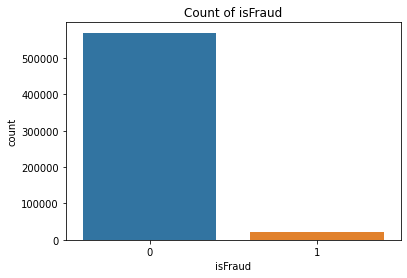

In [ ]:
isfraud = sns.countplot(data=train_data, x='isFraud').set(title='Count of isFraud')
print(train_data['isFraud'].value_counts())
ratio = (train_data['isFraud'][train_data['isFraud'] == 1]).count()/len(train_data)*100
print("Ratio of fraud data is {:.4f} %".format(ratio))
print("Ratio of non fraud data is {:.4f} %".format(100-ratio))

plt.savefig("isfraud count.png")

## EDA

In [ ]:
def cat_num_features(df):
    
    catf = []
    numf = []
    
    # Given Categorical Features 
    catf = ['ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', \
            'card6', 'addr1', 'addr2', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', \
            'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', \
            'DeviceType', 'DeviceInfo']
    catf+=['id_'+str(i) for i in range(12,39)]

    # Updating the Categorical Feature Names List based on the columns present in the dataframe
    catf = [feature for feature in catf if feature in df.columns.values]
    numf = [feature for feature in df.columns if feature not in catf and not feature == 'isFraud']
    
    return (catf, numf)  

In [ ]:
catf, numf = cat_num_features(train_data)

In [ ]:
# Filling all the NaN values of Non-Numeric Categorical Features with "NaN" string to perform EDA

non_num = [f for f in catf if train_data[f].dtype == object]
train_data[non_num] = train_data[non_num].fillna('NaN')

In [ ]:
def whisk(x):
  q1 = np.nanpercentile(x, 25)
  q3 = np.nanpercentile(x, 75)
  iqr = q3 - q1
  lower_fence = q1 - 1.5*iqr
  upper_fence = q3 + 1.5*iqr

  #identifikasi nonoutlier
  non_outlier = []
  for num in x:
    if num >= lower_fence and num <= upper_fence:
      non_outlier.append(num)
  lower_whisker = np.min(non_outlier)
  upper_whisker = np.max(non_outlier)
  #identifikasi outlier
  outlier = []
  for num in x:
    if num < lower_fence or num > upper_fence:
      outlier.append(num)

  print("========= Basic Stats ==========")
  print(f"Mean: {x.mean()}")
  print(f"Min: {np.min(x)}")
  print(f"Max: {np.max(x)}")
  print(f"Std: {x.std()}")
  print("====== Quantiles and IQR =======")
  print('q1: {}'.format(q1))
  print('q3: {}'.format(q3))
  print(f"IQR: {iqr}")
  print("============= Whisk ============")
  print('Lower Fence: {}'.format(lower_fence))
  print('Upper Fence: {}'.format(upper_fence))
  print(f"Lower whisker: {lower_whisker}")
  print(f"Upper whisker: {upper_whisker}")
  print()
  print(f"Jumlah outlier: {len(outlier)}")
  print(f"Outliers: {outlier}")
  print()
  print("Skew adalah: {}".format(skew(x)))
  print(f"Hasil dari skewtest adalah stats: {skewtest(x)[0]}, p-value:{skewtest(x)[1]}")

  if skewtest(x)[1] < 0.05:
    print('p-value dibawah 0.05, Data Skewed')
  else:
    print('p-value diatas Data tidak skewed, relatif simetris')

In [ ]:
def show_stats_numeric(data_col):
  print("Number of data: {}".format(len(data_col)))
  print("Mean: {}".format(data_col.mean()))
  print("Max: {}".format(data_col.max()))
  print("Min: {}".format(data_col.min()))
  print("Q1: {}".format(np.percentile(data_col, 25)))
  print("Q2: {}".format(np.percentile(data_col, 50)))
  print("Q3: {}".format(np.percentile(data_col, 75)))

#### TransactionDT

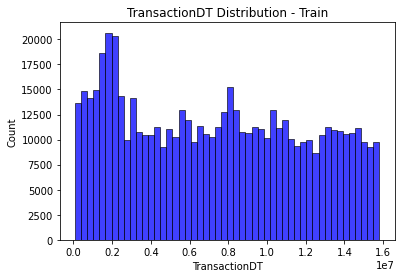

In [ ]:
sns.histplot(data=train_data,x='TransactionDT', bins=50, color='blue', label='train', legend=True).set(title='TransactionDT Distribution - Train')
plt.savefig('transactiondt train dist.png')

In [ ]:
show_stats_numeric(train_data['TransactionDT'])

Number of data: 590540
Mean: 7372311.310116165
Max: 15811131
Min: 86400
Q1: 3027057.75
Q2: 7306527.5
Q3: 11246620.0


In [ ]:
(train_data['TransactionDT'].max() - train_data['TransactionDT'].min())

15724731

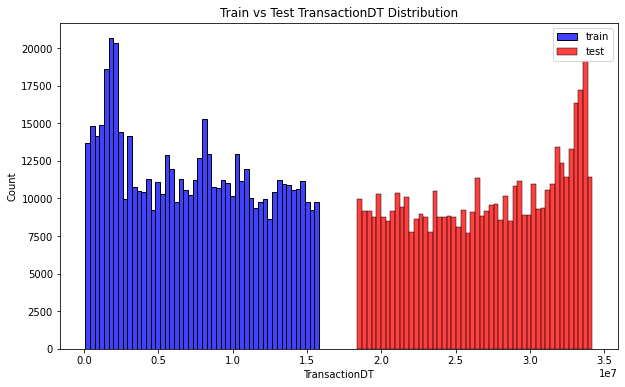

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
# label=['train', 'test']
sns.histplot(data=train_data,x='TransactionDT', bins=50, ax=ax, color='blue', label='train', legend=True)
sns.histplot(data=test_data,x='TransactionDT', bins=50, ax=ax, color='red', label='test')
ax.set_title('Train vs Test TransactionDT Distribution')
ax.legend()
plt.show()
fig.savefig("train vs test transactionDT dist.png")

 Dapat dilihat bahwa ternyata TransactionDT dari train dan test  data terpisah dari segi waktu. Menurut literatur dan diskusi yang ada di forum Kaggle, data train dan test ini terpisah sejauh 30 hari atau sekitar 1 bulan. Walau fitur TransactionDT bukan lah menunjukkan Date time, namun fitur ini dapat digunakan untuk merepresentasikan waktu

#### TransactionAmt

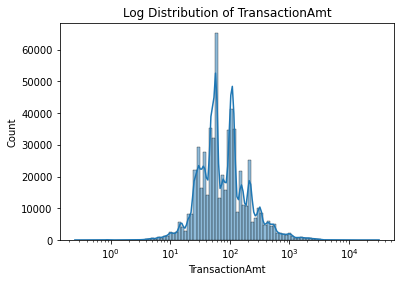

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=train_data, x='TransactionAmt', bins=100, ax=ax, log_scale=True, kde=True).set(title='Log Distribution of TransactionAmt')
fig.savefig('Distribusi log TransactionAmt.png')

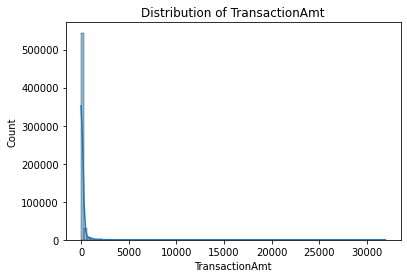

In [ ]:
fig, ax = plt.subplots()
sns.histplot(data=train_data, x='TransactionAmt', bins=100, ax=ax, kde=True).set(title='Distribution of TransactionAmt')
fig.savefig('Distribusi TransactionAmt.png')

In [ ]:
whisk(train_data['TransactionAmt'])

========= Basic Stats ==========
Mean: 135.02717637247264
Min: 0.251
Max: 31937.391
Std: 239.16252201373402
====== Quantiles and IQR =======
q1: 43.321
q3: 125.0
IQR: 81.679
============= Whisk ============
Lower Fence: -79.1975
Upper Fence: 247.51850000000002
Lower whisker: 0.251
Upper whisker: 247.51

Jumlah outlier: 66482
Outliers: [422.5, 363.89, 774.0, 500.0, 380.21, 2454.0, 250.0, 300.0, 445.0, 554.0, 280.0, 300.0, 280.0, 411.95, 318.95, 527.0, 1153.95, 444.61, 757.07, 2594.95, 3000.0, 587.82, 479.95, 973.95, 306.47, 445.0, 424.95, 311.95, 359.91, 1486.44, 2547.46, 445.0, 2948.95, 499.95, 590.4, 1973.0, 474.95, 250.0, 289.95, 2038.95, 385.78, 450.95, 1351.55, 554.0, 364.95, 335.0, 300.0, 412.73, 354.95, 524.0, 648.95, 335.0, 711.93, 500.0, 500.0, 500.0, 462.95, 500.0, 344.95, 250.0, 311.95, 500.0, 315.0, 1472.47, 3162.95, 2267.47, 3162.95, 335.0, 350.23, 303.95, 250.0, 424.95, 3000.0, 500.0, 250.0, 2424.95, 367.95, 311.95, 2294.95, 335.0, 300.0, 422.5, 554.0, 361.95, 424.95, 569.

In [ ]:
show_stats_numeric(train_data['TransactionAmt'])

Number of data: 590540
Mean: 135.02717637247264
Max: 31937.391
Min: 0.251
Q1: 43.321
Q2: 68.769
Q3: 125.0


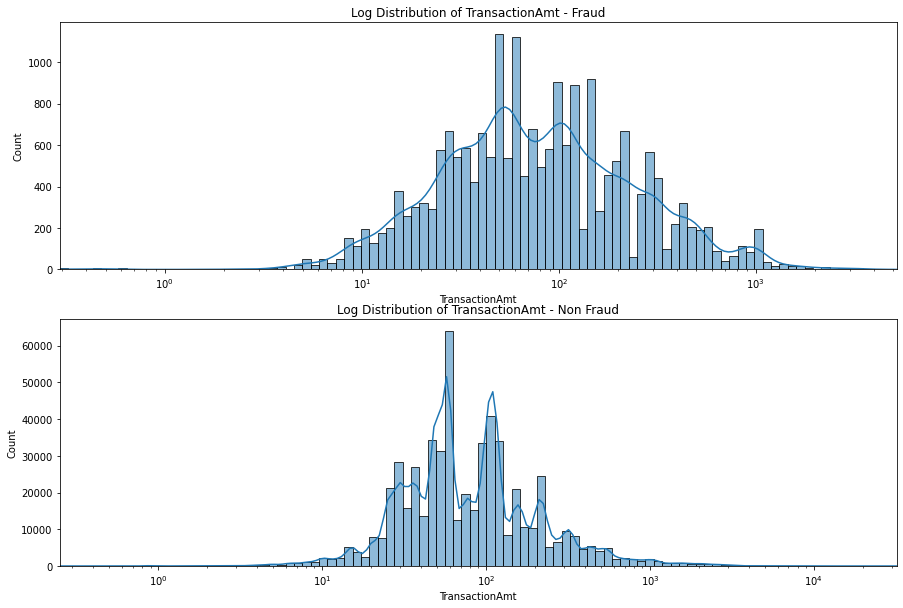

In [ ]:
fraud = train_data.loc[train_data['isFraud'] == 1]
nonfraud = train_data.loc[train_data['isFraud'] == 0]
fig, ax = plt.subplots(2, 1, figsize=(15,10))

sns.histplot(data=fraud, x='TransactionAmt', bins=100, ax=ax[0], log_scale=True, kde=True)
sns.histplot(data=nonfraud, x='TransactionAmt', bins=100, ax=ax[1], log_scale=True, kde=True)

ax[0].set_xlim([min(fraud['TransactionAmt'].values), max(fraud['TransactionAmt'].values)])
ax[1].set_xlim([min(nonfraud['TransactionAmt'].values), max(nonfraud['TransactionAmt'].values)])

ax[0].set_title('Log Distribution of TransactionAmt - Fraud')
ax[1].set_title('Log Distribution of TransactionAmt - Non Fraud')

fig.savefig('Distribution of Fraud and Non Fraud TransactionAmt')

In [ ]:
print('Mean transaction amt for fraud is {:.4f}'.format(train_data.loc[train_data['isFraud'] == 1]['TransactionAmt'].mean()))
print('Mean transaction amt for non-fraud is {:.4f}'.format(train_data.loc[train_data['isFraud'] == 0]['TransactionAmt'].mean()))

Mean transaction amt for fraud is 149.2448
Mean transaction amt for non-fraud is 134.5117


Dapat dilihat bahwa rata-rata transaksi fraud lebih besar dibanding transaksi non fraud

Text(0.5, 1.0, 'Distribution of ProductCD - Non Fraud')

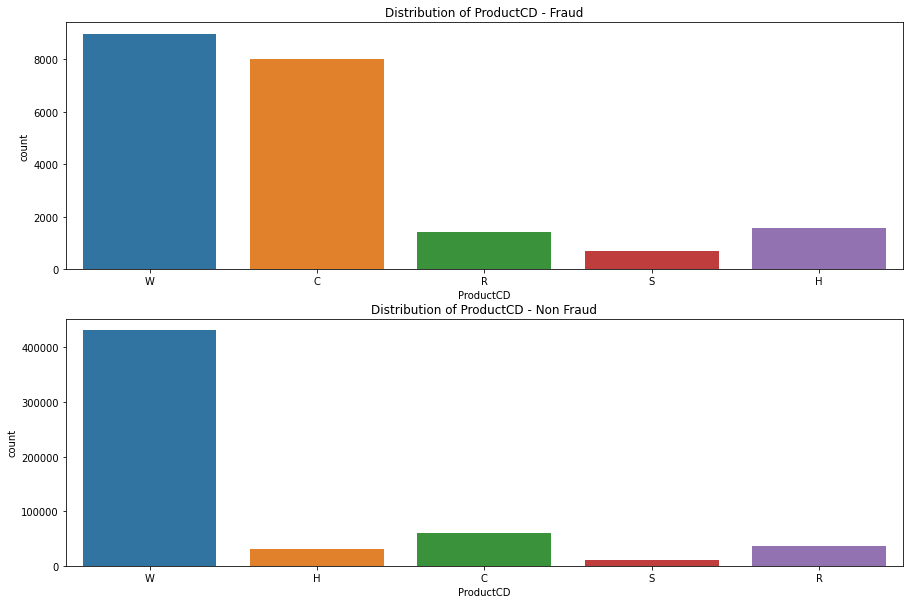

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(15,10))
sns.countplot(data=fraud, x='ProductCD', ax=ax[0])
sns.countplot(data=nonfraud, x='ProductCD', ax=ax[1])
ax[0].set_title('Distribution of ProductCD - Fraud')
ax[1].set_title('Distribution of ProductCD - Non Fraud')

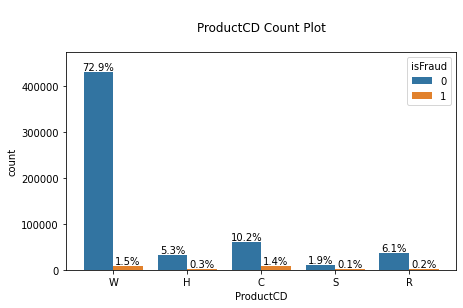

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))

sns.countplot(x='ProductCD', hue='isFraud', data = train_data)

plt.margins(0.05, 0.1)

for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('{:.1f}%'.format(100.*y/len(train_data)), (x.mean(), y), 
          ha='center', va='bottom') 

plt.title('\nProductCD Count Plot\n')
fig.savefig('ProductCD CountPlot.png')
plt.show()

1. ProductCD


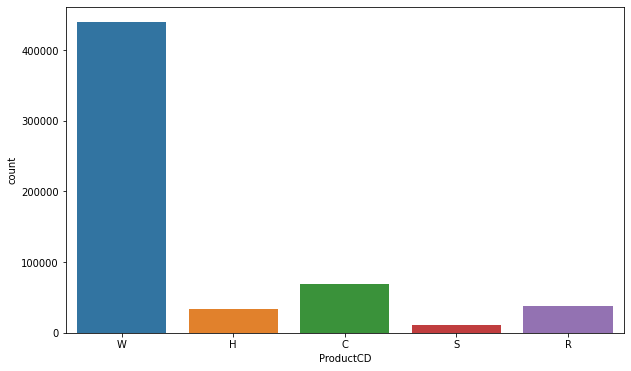

Jumlah Kategori: 5
Kategori: ['W' 'H' 'C' 'S' 'R']


AttributeError: ignored

In [ ]:
num = 1
for col in catf:
  print(f"{num}. {col}")
  fig, ax = plt.subplots(figsize=(10,6))
  sns.countplot(data=train_data, x=col)
  
  plt.show()
  category = train_data[col].unique()
  print(f"Jumlah Kategori: {len(category)}")
  print(f"Kategori: {category}")
  print(train_data[col].value_counts().n_largest(5))
  print("="*100)
  num +=1

## EDA Card Features

In [ ]:
def categorical_eda(cols, length, width):
  num = 1
  for col in cols:
    print(f"{num}. {col}")
    fig, ax = plt.subplots(figsize=(length,width))

    if train_data[col].dtype == 'object':
      sns.countplot(data=train_data, x=col, hue='isFraud')
      for p in ax.patches:
              x=p.get_bbox().get_points()[:,0]
              y=p.get_bbox().get_points()[1,1]
              ax.annotate('{:.1f}%'.format(100.*y/len(train_data)), (x.mean(), y), 
                      ha='center', va='bottom') 
    else:
      sns.histplot(x=col, data=train_data, hue='isFraud', kde=True)
    
    plt.show()
    category = train_data[col].unique()
    print(f"Jumlah Kategori: {len(category)}")
    print(f"Kategori: {category}")
    print(train_data[col].value_counts().nlargest(5))
    print("="*100)
    num +=1

In [ ]:
card_features = ['card'+str(i) for i in range(1,7) if "card"+str(i) in catf]

1. card1


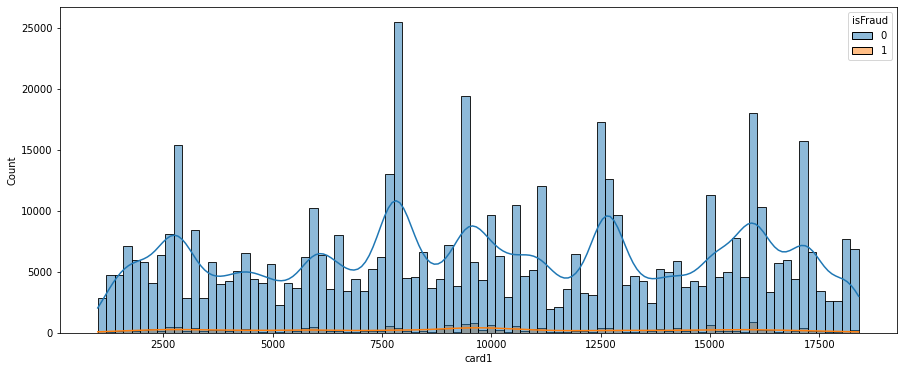

Jumlah Kategori: 13553
Kategori: [13926  2755  4663 ... 13166  8767 18038]
7919     14932
9500     14162
15885    10361
17188    10344
15066     7945
Name: card1, dtype: int64
2. card2


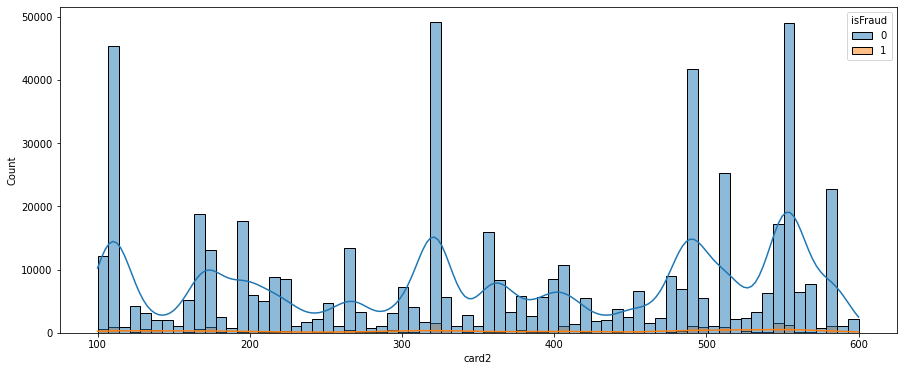

Jumlah Kategori: 501
Kategori: [ nan 404. 490. 567. 514. 555. 360. 100. 111. 352. 375. 418. 303. 314.
 543. 583. 148. 321. 269. 361. 272. 399. 569. 453. 417. 512. 545. 266.
 114. 481. 452. 547. 383. 170. 343. 556. 285. 562. 302. 264. 558. 500.
 396. 103. 206. 143. 243. 476. 199. 174. 423. 446. 492. 523. 440. 528.
 161. 535. 354. 117. 455. 325. 158. 268. 122. 479. 147. 215. 480. 265.
 388. 408. 309. 415. 414. 437. 104. 225. 101. 134. 586. 191. 491. 369.
 322. 494. 532. 313. 474. 324. 475. 298. 429. 432. 553. 566. 599. 296.
 251. 310. 242. 204. 250. 270. 346. 316. 194. 587. 390. 135. 536. 254.
 226. 327. 420. 260. 413. 428. 561. 387. 411. 392. 203. 297. 136. 276.
 142. 527. 210. 184. 459. 118. 585. 106. 588. 449. 176. 177. 246. 439.
 503. 445. 172. 468. 239. 496. 364. 533. 370. 578. 150. 458. 365. 359.
 509. 202. 584. 258. 442. 530. 489. 529. 504. 356. 123. 205. 130. 382.
 155. 105. 422. 345. 257. 171. 559. 271. 554. 127. 236. 548. 454. 373.
 275. 286. 308. 517. 294. 145. 565. 245. 513. 

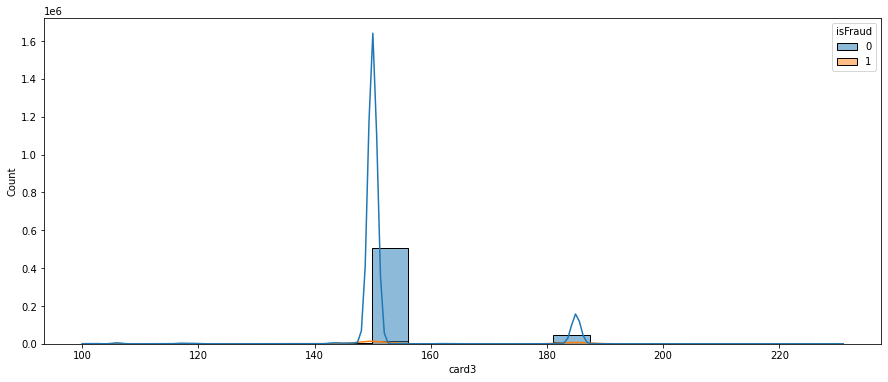

Jumlah Kategori: 115
Kategori: [150. 117. 185. 143. 144. 163. 146. 191. 162. 119. 147. 100. 135. 137.
 138. 102. 213. 106. 214. 148. 210. 203. 194. 141. 225.  nan 188. 193.
 208. 133. 223. 134. 153. 131. 200. 149. 116. 222. 220. 197. 129. 206.
 195. 204. 127. 142. 111. 159. 118. 229. 217. 212. 227. 166. 189. 120.
 171. 190. 105. 130. 170. 180. 177. 132. 109. 198. 121. 183. 215. 156.
 207. 186. 167. 152. 199. 219. 202. 126. 182. 123. 107. 221. 124. 231.
 157. 136. 128. 168. 101. 108. 125. 211. 164. 160. 161. 179. 155. 169.
 205. 209. 226. 174. 176. 181. 224. 122. 201. 175. 139. 172. 114. 228.
 184. 151. 173.]
150.0    521287
185.0     56346
106.0      1571
144.0      1252
146.0      1252
Name: card3, dtype: int64
4. card4


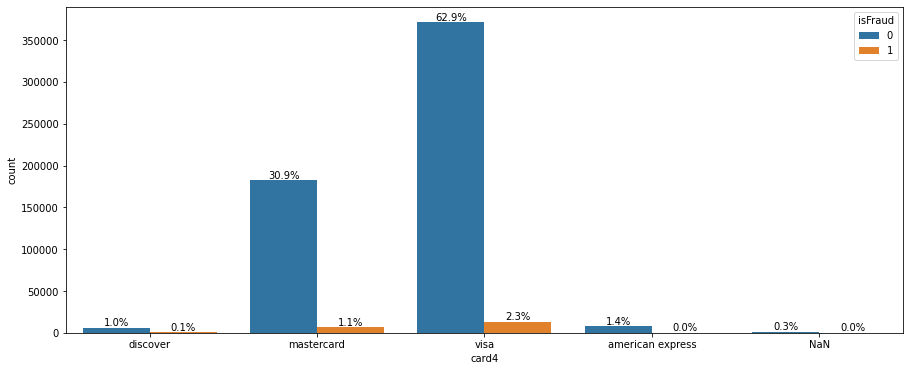

Jumlah Kategori: 5
Kategori: ['discover' 'mastercard' 'visa' 'american express' 'NaN']
visa                384767
mastercard          189217
american express      8328
discover              6651
NaN                   1577
Name: card4, dtype: int64
5. card5


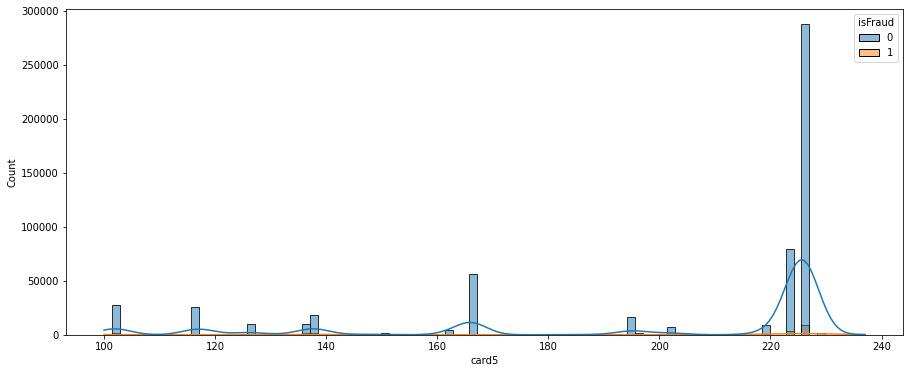

Jumlah Kategori: 120
Kategori: [142. 102. 166. 117. 226. 224. 134. 219. 137. 195. 138. 100. 147. 162.
 202. 118. 150. 183. 171. 236. 197. 133. 223. 149. 228. 229.  nan 198.
 182. 126. 185. 190. 131. 144. 141. 215. 203. 237. 132. 143. 146. 140.
 129. 199. 194. 213. 111. 169. 177. 173. 156. 119. 135. 107. 232. 188.
 159. 127. 148. 139. 104. 210. 180. 207. 204. 212. 106. 152. 222. 187.
 200. 214. 189. 181. 206. 225. 157. 121. 217. 184. 167. 113. 136. 120.
 201. 211. 122. 164. 123. 145. 172. 114. 231. 105. 221. 234. 130. 109.
 196. 101. 158. 230. 128. 191. 165. 115. 233. 216. 116. 178. 125. 163.
 205. 112. 168. 209. 235. 151. 175. 160.]
226.0    296546
224.0     81513
166.0     57140
102.0     29105
117.0     25941
Name: card5, dtype: int64
6. card6


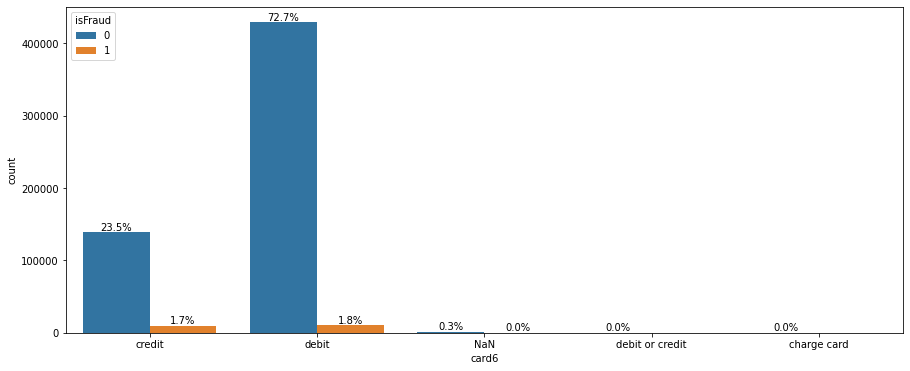

Jumlah Kategori: 5
Kategori: ['credit' 'debit' 'NaN' 'debit or credit' 'charge card']
debit              439938
credit             148986
NaN                  1571
debit or credit        30
charge card            15
Name: card6, dtype: int64


In [ ]:
categorical_eda(card_features, 15, 6)

In [ ]:
address_features = ['addr'+str(i) for i in range(1,3) if "addr"+str(i) in catf]

1. addr1


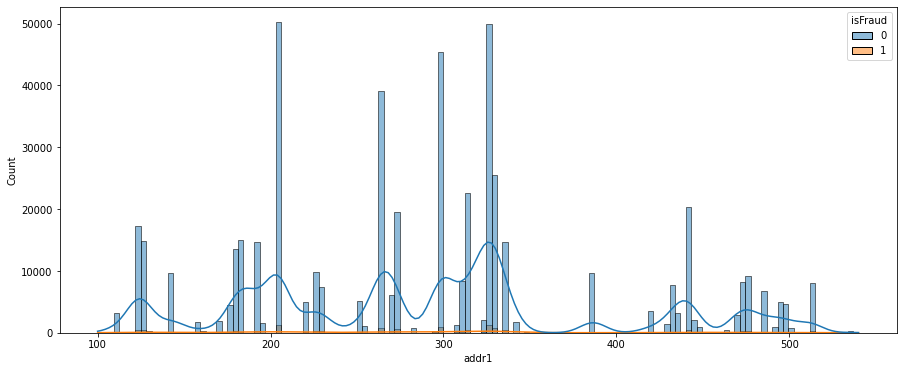

Jumlah Kategori: 333
Kategori: [315. 325. 330. 476. 420. 272. 126. 337. 204.  nan 226. 170. 184. 264.
 299. 441. 472. 251. 469. 191. 485. 122. 220. 205. 387. 181. 231. 436.
 327. 343. 123. 502. 269. 158. 433. 143. 225. 492. 177. 512. 310. 308.
 418. 494. 253. 428. 203. 110. 444. 498. 194. 536. 384. 324. 295. 448.
 157. 171. 224. 491. 274. 432. 459. 106. 296. 254. 452. 347. 335. 305.
 161. 221. 154. 130. 465. 451. 331. 511. 486. 312. 242. 131. 508. 332.
 283. 216. 431. 391. 333. 496. 304. 167. 261. 399. 164. 142. 393. 258.
 375. 483. 404. 482. 148. 218. 127. 403. 374. 477. 478. 241. 504. 453.
 535. 100. 239. 152. 500. 356. 198. 162. 244. 520. 531. 401. 427. 352.
 540. 456. 371. 409. 529. 505. 503. 346. 359. 499. 298. 190. 454. 172.
 145. 493. 119. 521. 270. 395. 366. 348. 313. 338. 139. 443. 183. 430.
 102. 470. 133. 233. 468. 185. 523. 411. 501. 425. 426. 365. 129. 141.
 137. 249. 402. 386. 290. 111. 132. 278. 506. 128. 213. 514. 314. 445.
 252. 328. 210. 144. 193. 382. 306. 385. 235. 

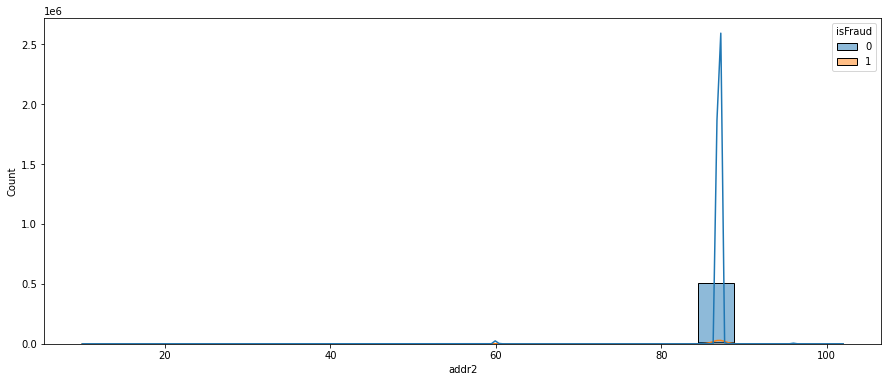

Jumlah Kategori: 75
Kategori: [ 87.  nan  96.  35.  60.  98.  43.  65.  32.  13.  31. 101.  24.  16.
  15.  19.  71.  59. 102.  44.  26.  69.  47.  78.  88.  66.  72.  22.
  57.  25.  17.  30.  29.  21.  14.  49.  83.  75.  34.  86.  48.  68.
  23.  70.  62.  54.  50.  52.  39.  76.  10.  73.  97.  63.  27.  28.
  38.  74.  77.  92.  79.  84.  82.  40.  36.  46.  18.  20.  89.  61.
  94. 100.  55.  51.  93.]
87.0    520481
60.0      3084
96.0       638
32.0        91
65.0        82
Name: addr2, dtype: int64


In [ ]:
categorical_eda(address_features, 15, 6)

EDA Domain Features

In [ ]:
domain_features = ['P_emaildomain', 'R_emaildomain']

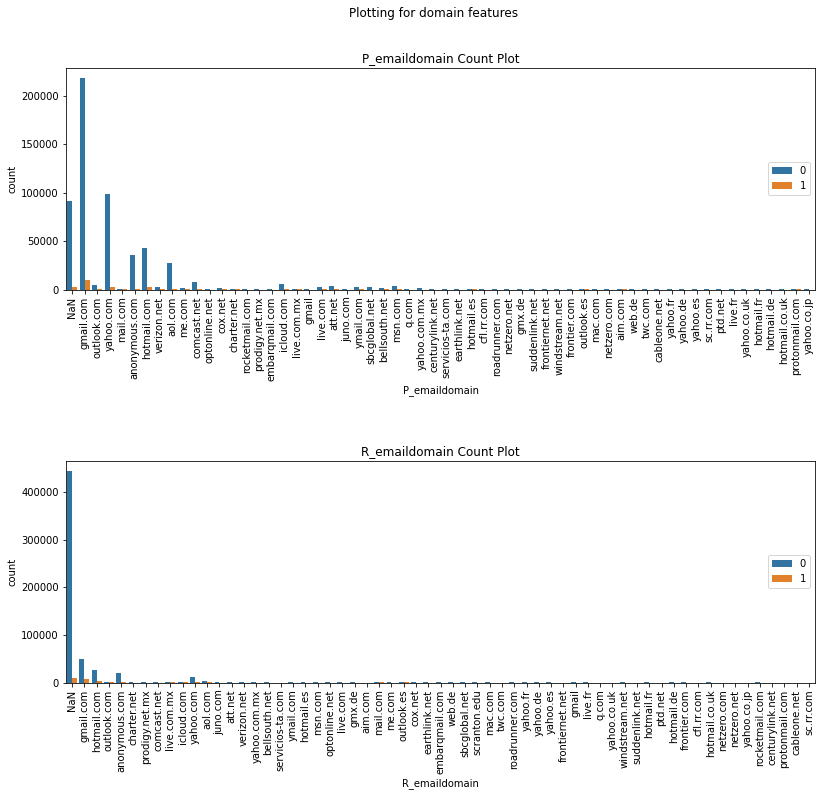

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(15, 13))

fig.tight_layout(pad=15.0)
fig.suptitle('Plotting for domain features', y=0.9)
idx = 0

for i in range(2):
    
        if(idx==len(domain_features)):
            break
            
        f = domain_features[idx]
        idx+=1
        
        sns.countplot(x=f,hue='isFraud', data=train_data, ax=axes[i])
        
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='center')
        axes[i].legend(loc=7)
        axes[i].set_title(f+" Count Plot")

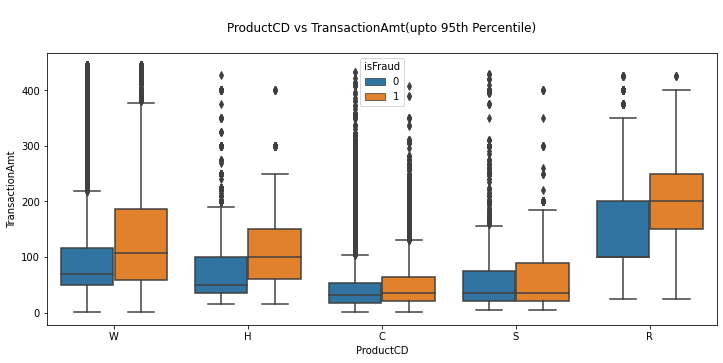

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='ProductCD', y='TransactionAmt', data=train_data[train_data['TransactionAmt']<=np.percentile(train_data['TransactionAmt'], 95)], hue='isFraud')
plt.title('\nProductCD vs TransactionAmt(upto 95th Percentile)\n')
plt.show()